<a href="https://colab.research.google.com/github/RodrigoZonzin/complex_networks/blob/main/atv3/atv3_redesComplexas_karate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## Rede Social de Golfinhos

In [11]:
dolphins_net = nx.read_gml('/content/drive/MyDrive/Faculdade/redes_complexas/karate/karate.gml', label = 'id')

In [12]:
df_dolphins = pd.DataFrame(columns= ['closeness', 'betweenness', 'eigencentrality'])

In [13]:
def describe_network(net):
  print(f'Num od Nodes: {net.number_of_nodes()}')
  print(f'Num od Edges: {net.number_of_edges()}')
  print(f'Desidade: {nx.density(net):.4f}')
  print(f'Clustering médio: {nx.average_clustering(net):.4f}')
  print(f"Distância média {nx.average_shortest_path_length(net)}")

  df_dolphins['closeness'] = nx.closeness_centrality(net)
  df_dolphins['betweenness'] = nx.betweenness_centrality(net)
  df_dolphins['eigencentrality'] = nx.eigenvector_centrality(net)
  df_dolphins['degree'] = [a[1] for a in nx.degree(net)]

In [14]:
describe_network(dolphins_net)
df_dolphins

Num od Nodes: 34
Num od Edges: 78
Desidade: 0.1390
Clustering médio: 0.5706
Distância média 2.408199643493761


,closeness,betweenness,eigencentrality,degree
1,0.568966,0.437635,0.355483,16
2,0.485294,0.053937,0.265954,9
3,0.559322,0.143657,0.317189,10
4,0.464789,0.011909,0.211174,6
5,0.379310,0.000631,0.075966,3
6,0.383721,0.029987,0.079481,4
7,0.383721,0.029987,0.079481,4
8,0.440000,0.000000,0.170955,4
9,0.515625,0.055927,0.227405,5
10,0.434211,0.000848,0.102675,2


In [15]:
df_dolphins.describe()

,closeness,betweenness,eigencentrality,degree
count,34.000000,34.000000,34.000000,34.000000
mean,0.426480,0.044006,0.146411,4.588235
std,0.072092,0.093935,0.090649,3.877813
min,0.284483,0.000000,0.023635,1.000000
25%,0.371840,0.000000,0.080673,2.000000
50%,0.383721,0.002566,0.102041,3.000000
75%,0.480168,0.031853,0.186967,5.000000
max,0.568966,0.437635,0.373371,17.000000


## Plot da Rede

In [16]:
pos = nx.spring_layout(dolphins_net, seed=675)

In [37]:
def draw_net(G, pos, measures, measure_name):
    plt.figure(figsize=(9, 9))
    nodes = nx.draw_networkx_nodes(G, pos, cmap=plt.cm.copper,
                                   node_color= list(measures),
                                   edgecolors= 'black',
                                   nodelist=measures.keys(),
                                   node_size = list(measures))
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes, location = 'bottom', fraction=0.046, pad=0.04)
    plt.axis('off')
    plt.show()

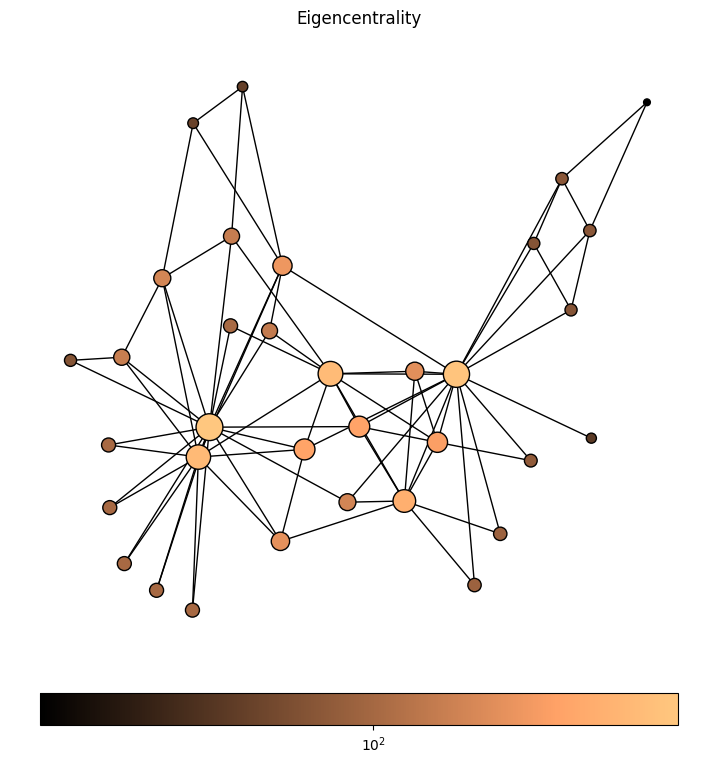

In [38]:
draw_net(dolphins_net, pos, df_dolphins['eigencentrality']*1000, "Eigencentrality")

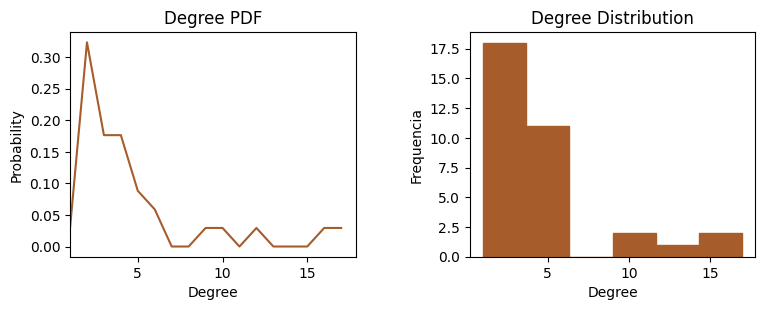

In [41]:
# Calculate the frequency counts
degree_counts = nx.degree_histogram(dolphins_net)

# Normalize the frequency counts to get probabilities
total_nodes = dolphins_net.order()
degree_probs = [count / total_nodes for count in degree_counts]


# Plot the PDF
fig = plt.figure(figsize=(14,7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(231)
plt.plot(degree_probs, '-', color='#a65c2b')
plt.title('Degree PDF')
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.xlim(left=1)

#plot the histogram
plt.subplot(232)
plt.hist(df_dolphins['degree'], bins=6, color='#a65c2b', edgecolor='#a65c2b')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequencia')
plt.show()

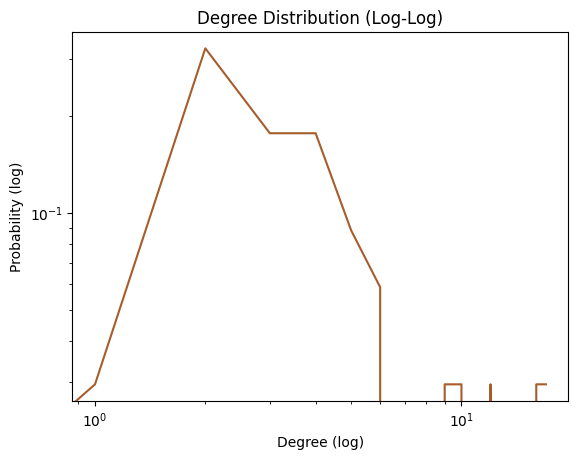

In [40]:
# Plot the degree distribution on a log-log scale
plt.loglog(range(len(degree_probs)), degree_probs, '-', color='#a65c2b')
plt.title('Degree Distribution (Log-Log)')
plt.xlabel('Degree (log)')
plt.ylabel('Probability (log)')
plt.show()